In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.signal import find_peaks

# Sampling

In [2]:
# Generate a sample signal (sine wave with noise)
fs = 500  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)

# Nosisy Signal to filter noise

In [9]:
original_signal = 10 * np.sin(2 * np.pi * 50 * t) + 2 * np.sin(2 * np.pi * 120 * t)
noisy_signal = original_signal + 3 * np.random.normal(0, 0.5, t.shape)

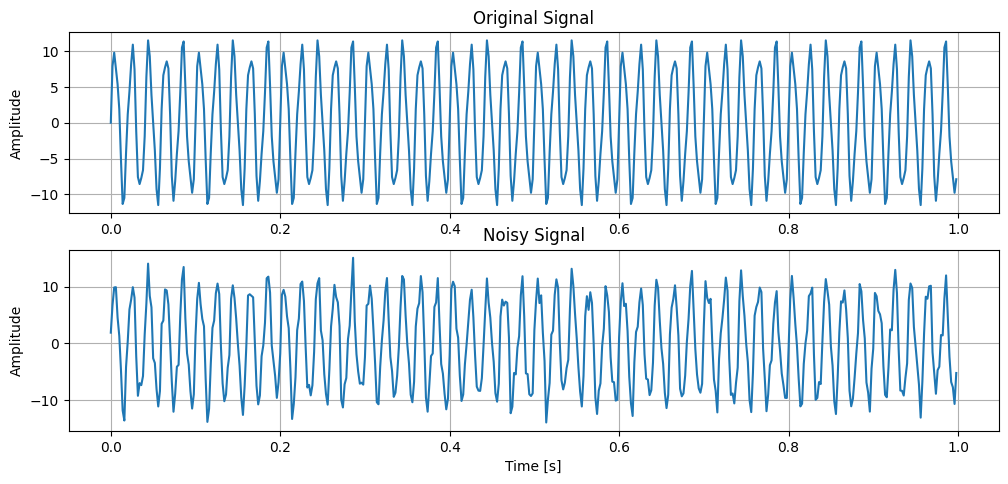

In [10]:
# Plot the original, noisy, and reconstructed signals
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, original_signal)
plt.title('Original Signal')
# plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal)
plt.title('Noisy Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Find FFT amplitude peaks

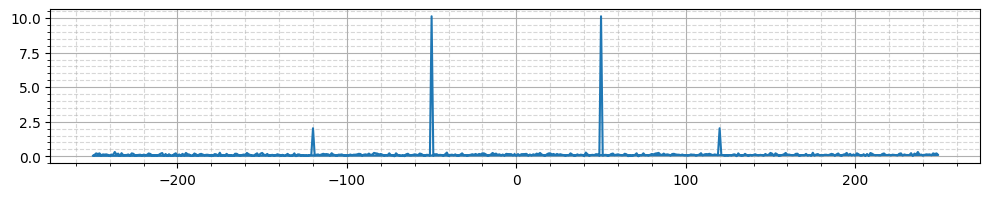

In [11]:
# Perform FFT
signal_fft = 2 * np.fft.fft(noisy_signal, norm="forward")
frequencies = np.fft.fftfreq(len(noisy_signal), 1/fs)

plt.figure(figsize=(12, 2))
plt.plot(frequencies, np.abs(signal_fft))
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor', linestyle='--', alpha=0.5)
plt.minorticks_on()

## Statistics of the amplitude

Fro the statics of the amplitude, decide the threshold peak heifght.

* Moving average to cancel the noises and extract the principal signals.
* Supress frequencies below and beyond human audible levels. 

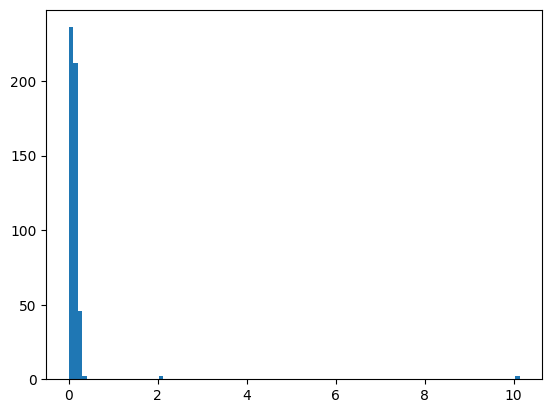

In [19]:
_ = plt.hist(np.abs(signal_fft), density=False, bins=100)

# Find the principal frequencies


In [12]:
peaks, _ = find_peaks(np.abs(signal_fft), height=1)
principal_freqs = frequencies[peaks]
principal_amplitudes = np.abs(signal_fft)[peaks]
principal_phases = np.angle(signal_fft)[peaks]

# Reconstruct the signal from principal frequencies

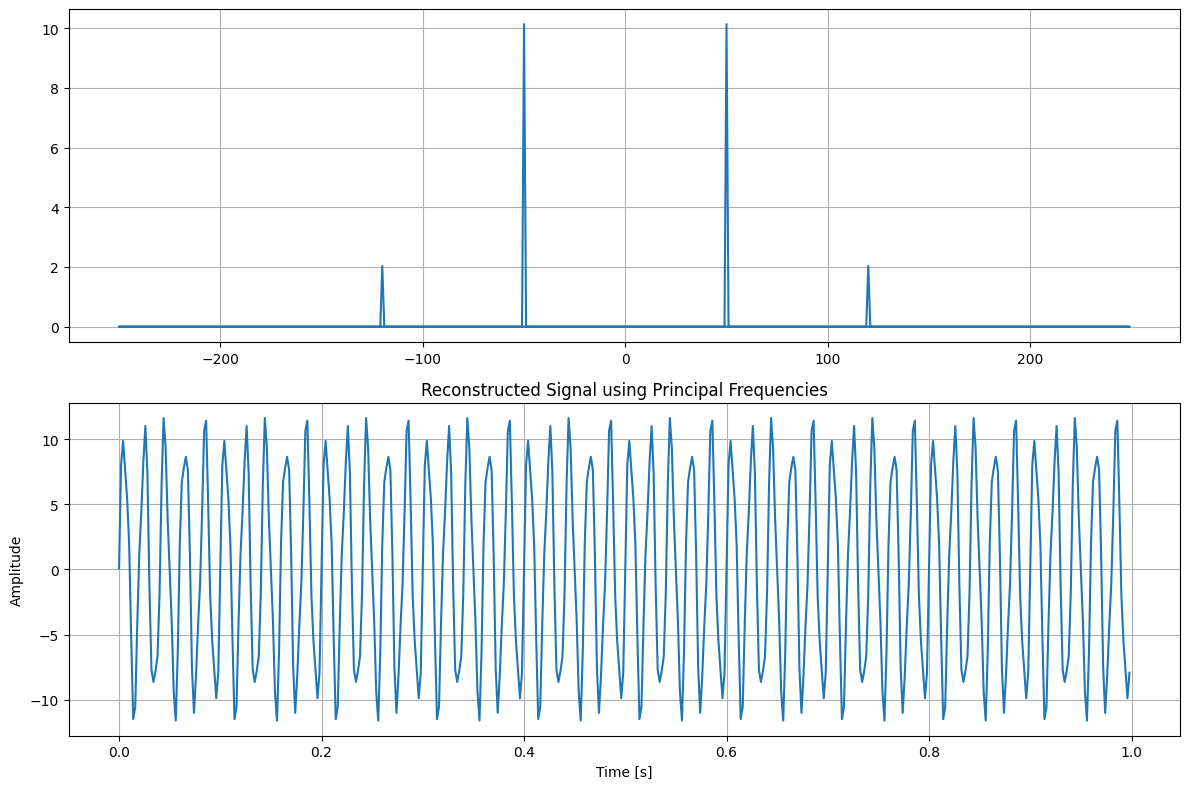

In [13]:
reconstructed_fft = np.zeros_like(signal_fft)
for i, freq in enumerate(principal_freqs):
    index = np.where(frequencies == freq)[0][0]
    reconstructed_fft[index] = principal_amplitudes[i] * np.exp(1j * principal_phases[i])

# Perform inverse FFT to get the reconstructed signal
reconstructed_signal = ifft(reconstructed_fft / 2, norm="forward").real

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.grid()
plt.plot(frequencies, np.abs(reconstructed_fft))

plt.subplot(2, 1, 2)
plt.plot(t, reconstructed_signal)
plt.title('Reconstructed Signal using Principal Frequencies')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

In [8]:
principal_freqs

array([ 50., -50.])